In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
file_path = 'force2020_data_unsupervised_learning.csv'
df = pd.read_csv(file_path, index_col='DEPTH_MD')

In [4]:
df.dropna(inplace=True)

In [5]:
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df)

In [6]:
scaler = MinMaxScaler()

df[['RHOB_T', 'NPHI_T', 'GR_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(df[['RHOB', 'NPHI', 'GR', 'PEF', 'DTC']])

In [7]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,0.201434,0.954879,0.100848,0.031750,0.851428
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,0.220316,1.000000,0.111068,0.032605,0.801002
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,0.232286,0.954997,0.113479,0.032655,0.762881
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,0.240622,0.871779,0.111234,0.031041,0.771576
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,0.229533,0.789378,0.106141,0.023785,0.818636
...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,0.698276,0.398220,0.171146,0.224688,0.284218
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,0.690599,0.410751,0.167659,0.224688,0.281565
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,0.670334,0.428981,0.174375,0.224688,0.296449


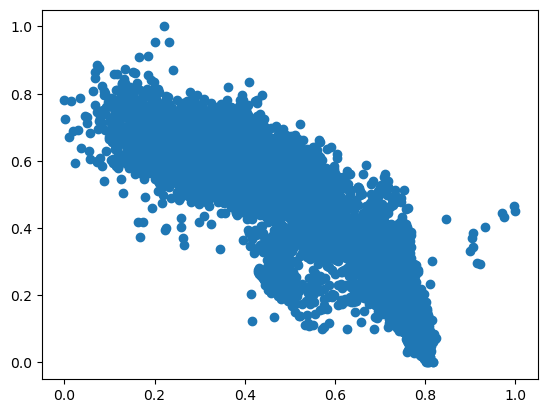

In [8]:
plt.scatter(df['RHOB_T'], df['NPHI_T'])

In [9]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    # Elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k), inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

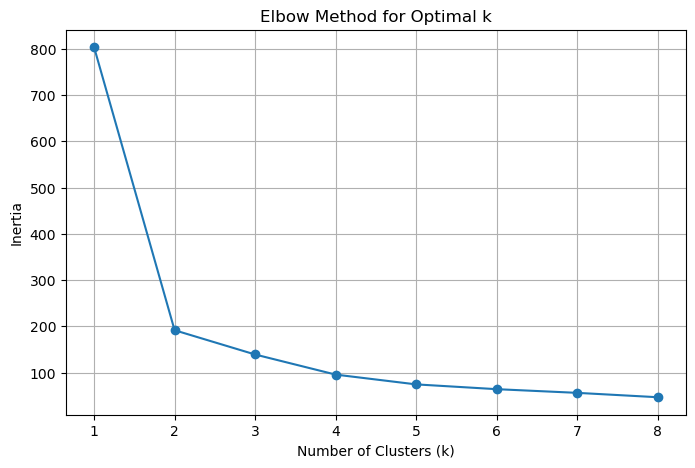

In [10]:
optimise_k_means(df[['RHOB_T', 'NPHI_T']], 9)

In [17]:
import time
start_time = time.time()
n_clusters=2
kmeans = KMeans(n_clusters)

kmeans.fit(df[['RHOB_T', 'NPHI_T']])

df['cluster'] = kmeans.labels_
end_time = time.time()
execution_time = end_time - start_time

kmeans.cluster_centers_

array([[ 1.28753694, -1.30621393],
       [-0.58276374,  0.59121731]])

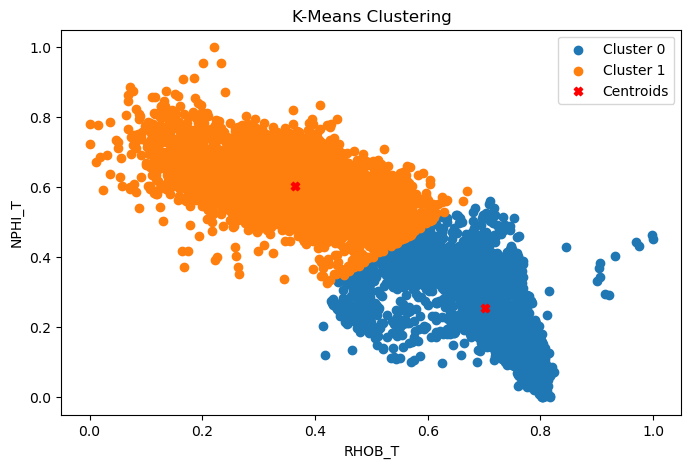

In [12]:
plt.figure(figsize=(8, 5))
for i in range(n_clusters):
    cluster_data = df[df.cluster == i]
    plt.scatter(cluster_data['RHOB_T'], cluster_data['NPHI_T'], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroids')

plt.xlabel('RHOB_T')
plt.ylabel('NPHI_T')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [13]:
silhouette_avg = silhouette_score(df[['RHOB_T', 'NPHI_T']], df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6779860829673263


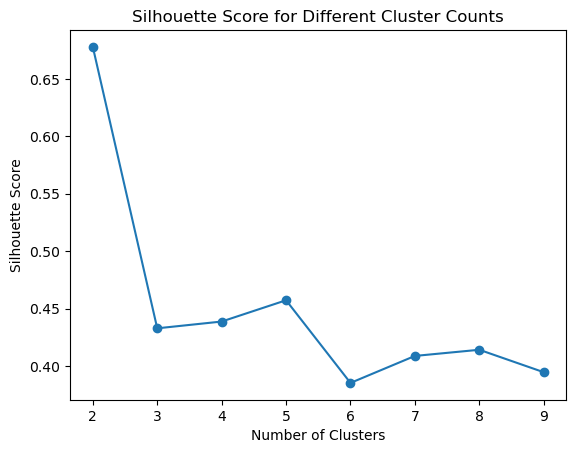

Optimal number of clusters: 2


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Standardize the features
scaler = StandardScaler()
df[['RHOB_T', 'NPHI_T']] = scaler.fit_transform(df[['RHOB_T', 'NPHI_T']])
silhouette_scores = []
range_n_clusters = range(2, 10)  
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['RHOB_T', 'NPHI_T']])
    score = silhouette_score(df[['RHOB_T', 'NPHI_T']], cluster_labels)
    silhouette_scores.append(score)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_clusters}')


In [16]:
import nbformat
from nbconvert import ScriptExporter

def convert_notebook_to_script(notebook_path, output_path):
    # Load the notebook
    with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
        notebook_content = nbformat.read(notebook_file, as_version=4)
    
    # Initialize the script exporter
    script_exporter = ScriptExporter()
    
    # Export the notebook to a Python script
    script_content, _ = script_exporter.from_notebook_node(notebook_content)
    
    # Write the Python script to the output path
    with open(output_path, 'w', encoding='utf-8') as script_file:
        script_file.write(script_content)

# Example usage
notebook_file_path = "k-means.ipynb"  # Replace with your notebook's file path
output_script_path = "output_script.py"    # Replace with your desired output path
convert_notebook_to_script(notebook_file_path, output_script_path)
print(f"Notebook converted to Python script at: {output_script_path}")

Notebook converted to Python script at: output_script.py


In [18]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index for KMeans model
dbi_kmeans = davies_bouldin_score(df[['RHOB_T', 'NPHI_T']], df['cluster'])

print(f"Davies-Bouldin Index for KMeans: {dbi_kmeans}")
print(f"Execution Time for KMeans: {execution_time:.4f} seconds")



Davies-Bouldin Index for KMeans: 0.4663986708927107
Execution Time for KMeans: 0.0130 seconds
